# Step 1: Download all the CSV files using web-scraping script

*Create directories to store these datasets*

In [ ]:
import pandas as pd

import zipfile
import requests
# import numpy
# import pandas as pd
import os
import pickle
# from io import BytesIO
# from zipfile import ZipFile
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Create directories for storage (When using colab uncomment code below)
#from google.colab import drive 
#drive.mount('drive')

# Change the following paths to match with your pc
dirpath = r'C:\Users\wolde\Documents\Capstone' # Change to desired directory
listpath = r'C:\Users\wolde\Documents\Capstone\curr_list.txt' # List of links
if not os.path.exists(dirpath): # If directory does not exist yet, make it
    os.makedirs(dirpath)

# If list does not exist yet, make it
try:
    with open(listpath, 'rb') as f:
        curr_List = pickle.load(f)
except IOError:
    curr_List = []

print(curr_List)

# Open website
url = "https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html"   
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

# Identify url links of required zip files
zipfile_urls = soup.select("a[href$='CSV.zip']")
links = [link.get('href') for link in zipfile_urls]
zipLinks = ["http:" + s for s in links]

# Get difference between website list and current list
diff = list(set(zipLinks) - set(curr_List))

print(diff)
# Extract necessary zip content to directory
import io
for i in diff:
    r = requests.get(i)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(dirpath)

# Update current list of zip files and store in txt file
new_List = zipLinks
with open(listpath, 'wb') as f:
    pickle.dump(new_List, f)

# Step 2: Create a new AWS RDS Database with the desired computational capabilities and capacities

**Go to AWS account and create one using the user interface.**

# Step 3: Combine all the CSV files

In [ ]:
# import numpy
import os
# from io import BytesIO
# from zipfile import ZipFile
import glob
import pandas as pd
import datetime
import fnmatch
import csv
from datetime import datetime, timedelta
dirpath = r'C:\Users\wolde\Documents\Capstone' # Change to desired directory
os.chdir(dirpath)
csv_list = []
# Convert current time to seconds
currDate = datetime.today() 
currSec = currDate.timestamp()
# For each csv file in directory containing raw data  
for file_name in glob.glob(os.path.join(dirpath, '*.csv')):
    if fnmatch.fnmatch(file_name, '*puf*') and not "repwgt" in file_name:
        # Get time the file was modified
        fileSec = os.path.getmtime(file_name)
        diffTime = currSec - fileSec
        # If file was modified within last 24 hours
        if diffTime <= 86400:
            print(file_name)
        # Add file name to list of csv files
        csv_list.append(file_name)

# If directory does not exist yet, make it
comPath = r'C:\Users\wolde\Documents\Capstone\Combined' # Change to desired directory
if not os.path.exists(comPath): 
     os.makedirs(comPath)

# If the dataset for each phase does not exist, make it and store into dataframe
from itertools import chain
os.chdir(comPath)
comb1 = r'C:\Users\wolde\Documents\Capstone\Combined\combined_new.csv' # Change to appropiate file path

# Inside csv_list[], make sure to have a [0: max week # - 1]
if not os.path.exists(comb1):
    csv_new = list(chain(csv_list[0:11]))
    combined_csv = pd.concat([pd.read_csv(f) for f in csv_new ])
    combined_csv.to_csv( "combined_new.csv", index=False, encoding='utf-8-sig')

# Step 4: Download MySQL Workbench or other MySQL client for the following steps

# Step 5: Using credentails and address, connect to AWS DB using new client. 

**Make sure to test connection before use**

# Step 6: Create Table

### **This would require some manual input**

#### Once the previous chuck has been ran, the combined_new CSV file would have been downloaded.

- **Visit https://www.rebasedata.com/convert-csv-to-mysql-online** **and upload a single CSV file**

This will generate and a MySQL file that contains a script to create a table for the data which includes the new csv files that we are updating. *Depending on the size of the file, it might take some time*. 

- Download the Generated SQL Script and open it on any avaiable software, for our examples below, we used MySQL Workbench 
- Next, write, "USE database_name" then paste the text within the red line into a SQL query script using whichever MySQL client downloaded. 

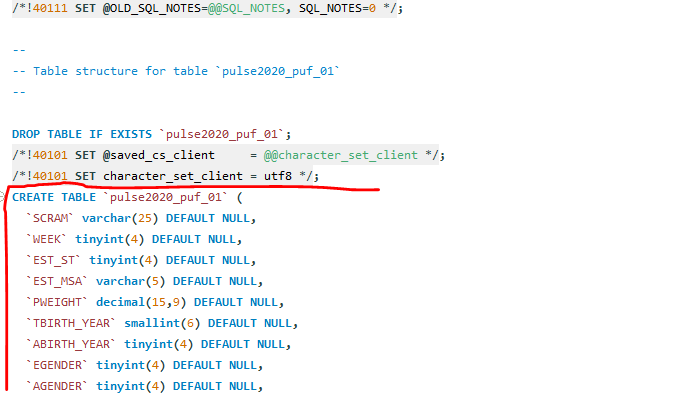
### ...

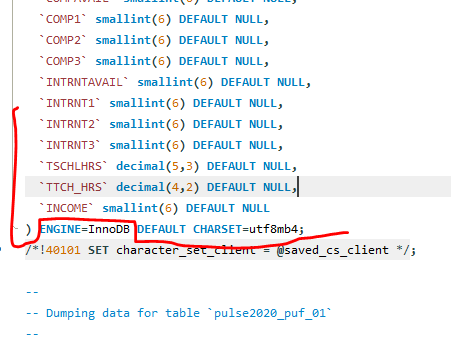
 


#### **We will now create a new table by running the script**

# Step 7: Populate DB

**Replace the database name and file path to match on made for the following script code below.**  

> USE Census_survey;  

> LOAD DATA LOCAL INFILE 'C:/Users/wolde/Documents/Capstone/combined_all.csv'  
>INTO TABLE survey_data  
>FIELDS TERMINATED BY ','   
>LINES TERMINATED BY '\n'  

# Now run the script and the Database should be ready